In [366]:
import pandas as pd

# Assuming the processed logs are stored in a CSV file
file_path = 'git_log_processed.csv'
processed_logs_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
processed_logs_df.head()

,hash,release,message,timestamp,author,change_type
0,ee1d06c8fa1f0a6bf2e6ffb189c15266bbbd1d76,(tag: 19.0.0),release: cut the v19.0.0-rc.0 release,2024-10-30 19:59:28+00:00,Alex Rickabaugh,release
1,48eac2320d66bca2b07d29f65b15636f4abadb50,(tag: 18.2.10),release: cut the v18.2.10 release,2024-10-30 19:03:32+00:00,Alex Rickabaugh,release
2,dcd16b43f31177a269317f7764ef38559b14fd66,(tag: 18.2.10),refactor(migrations): Make the explicit standa...,2024-10-29 22:04:20+00:00,Matthieu Riegler,refactor
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix
4,d504452e2f193d3b494a0b2944cddb028c0a2231,(tag: 18.2.10),fix(migrations): properly replace imports acro...,2024-10-29 17:07:01+00:00,Pawel Kozlowski,fix


In [367]:
#show only commits with "revert" inside of the commit message
revert_commits = processed_logs_df[processed_logs_df['message'].str.contains('revert', case=False)]
revert_commits.head()


,hash,release,message,timestamp,author,change_type
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix
51,1f4533807ebd4a130c5d174531179c4640dade47,(tag: 18.2.9),"Revert ""fix(forms): fix FormRecord type infere...",2024-10-22 20:41:03+00:00,Andrew Kushnir,fix
52,79d9be3e6309daafb86106cf78220bc027c61c41,(tag: 18.2.9),"Revert ""feat(forms): add ability to clear a Fo...",2024-10-22 20:40:54+00:00,Andrew Kushnir,feat
53,a5b0394313beda397b0c58a2897dc27678eefb57,(tag: 18.2.9),"Revert ""test(forms): add unit test (#50750)"" (...",2024-10-22 20:40:42+00:00,Andrew Kushnir,test
54,888657a12eca19d3a575ca25214ae6608bb9883a,(tag: 18.2.9),"Revert ""refactor(migrations): support parallel...",2024-10-22 19:01:57+00:00,Andrew Kushnir,refactor


In [368]:
#empty dataframe to store the reverted commits

pre_rev_com = pd.DataFrame(columns=['hash', 'release', 'message', 'timestamp', 'author', 'change_type'])

# Convert the 'timestamp' column to datetime format
processed_logs_df['timestamp'] = pd.to_datetime(processed_logs_df['timestamp'])

for index, row in revert_commits.iterrows():
    # #loop that loops 4 times
    # for i in range(4):
    #     pre_rev_com = pre_rev_com.append(processed_logs_df.loc[index+i])
    # Get the timestamp of the current revert commit
    revert_timestamp = row['timestamp']
    
    # Filter commits that happened up to 2 days before the current revert commit
    mask = (processed_logs_df['timestamp'] < revert_timestamp) & (processed_logs_df['timestamp'] >= (pd.to_datetime(revert_timestamp) - pd.Timedelta(days=5)))
    commits_to_append = processed_logs_df[mask]

    #if commits_to_append contains in message "revert" then dont append 
    if commits_to_append[commits_to_append['message'].str.contains('revert', case=False)].empty:
        pre_rev_com = pre_rev_com.append(commits_to_append, ignore_index=True)
    else:
        #get index of revrt commit inside of commits_to_append
        index_revert = commits_to_append[commits_to_append['message'].str.contains('revert', case=False)].index[0]
        #append all commits before revert commit    
        pre_rev_com = pre_rev_com.append(commits_to_append.loc[:index_revert-1], ignore_index=True)


#remove all but feat 
pre_rev_com = pre_rev_com[pre_rev_com['change_type'] == 'feat']



pre_rev_com.head()

C:\Users\hanch\AppData\Local\Temp\ipykernel_18772\2342718588.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre_rev_com = pre_rev_com.append(commits_to_append, ignore_index=True)
C:\Users\hanch\AppData\Local\Temp\ipykernel_18772\2342718588.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre_rev_com = pre_rev_com.append(commits_to_append.loc[:index_revert-1], ignore_index=True)


,hash,release,message,timestamp,author,change_type
32,2bfc64daf1cad9be8099759e8de7a361555ad5d1,(tag: 18.2.9),feat(migrations): expose output as function mi...,2024-10-22 10:13:38+00:00,Pawel Kozlowski,feat
33,ab25a192ba664863ad68d224b9b2df78da22769a,(tag: 18.2.9),feat(core): allow running output migration on ...,2024-10-22 10:12:17+00:00,Pawel Kozlowski,feat
57,6342befff8ee491f37e8912cccb0099bbbf01042,(tag: 18.2.9),feat(language-service): support migrating full...,2024-10-18 13:28:15+00:00,Paul Gschwendtner,feat
62,dff4de0f75741bc629462bb8da833b876c754453,(tag: 18.2.9),feat(migrations): add a combined migration for...,2024-10-18 08:39:59+00:00,Kristiyan Kostadinov,feat
74,e6e5d29e830a0a74d7677d5f2345f29391064853,(tag: 18.2.3),feat(core): initial version of the output migr...,2024-08-29 09:57:42+00:00,Pawel Kozlowski,feat


In [369]:
#show count of author inside of the pre_rev_com dataframe
pre_rev_com['author'].value_counts()


Alex Rickabaugh           64
Joey Perrott              50
Paul Gschwendtner         48
Kristiyan Kostadinov      35
Andrew Scott              35
                          ..
LASLEDJ                    1
cexbrayat                  1
Peter Johan Salomonsen     1
deebloo                    1
Victor Savkin              1
Name: author, Length: 112, dtype: int64

In [370]:
#show percentage wise to each author how many of theirs commits were reverted
authors = pre_rev_com['author'].value_counts()
authors = authors.reset_index()
authors.columns = ['author', 'reverted_commits']

# Get total commits for each author and reset the index
total_commits = processed_logs_df['author'].value_counts().reset_index()
total_commits.columns = ['author', 'total_commits']

# Merge the dataframes on the 'author' column
authors = authors.merge(total_commits, on='author')

# Calculate the percentage of reverted commits
authors['percentage'] = (authors['reverted_commits'] / authors['total_commits']) * 100

# order by percentage
authors = authors.sort_values(by='percentage', ascending=False)

# show only authors with more then 2 commits
authors = authors[authors['total_commits'] == 3 ]

authors.head(40)




,author,reverted_commits,total_commits,percentage
51,Julien Saguet,2,3,66.666667
103,Ahmed Ayed,1,3,33.333333
77,Jesse Palmer,1,3,33.333333
94,Michal Materowski,1,3,33.333333
86,Daniel Puckowski,1,3,33.333333


In [371]:
#what are change_types count before revert
pre_rev_com['change_type'].value_counts()


feat    793
Name: change_type, dtype: int64

In [372]:
# check who usually reverts the commits
revert_authors = revert_commits['author'].value_counts()

revert_authors

Andrew Scott             61
Alex Rickabaugh          55
Matias Niemel├ñ          43
Jessica Janiuk           41
Andrew Kushnir           41
atscott                  37
Mi┼íko Hevery            32
Victor Berchet           24
Jason Aden               23
Kara Erickson            23
Chuck Jazdzewski         21
Dylan Hunn               21
Misko Hevery             20
Igor Minar               17
Pete Bacon Darwin        15
Joey Perrott             13
Pawel Kozlowski          13
Tobias Bosch             10
Kristiyan Kostadinov      9
Greg Magolan              8
Alex Eagle                8
Wagner Maciel             6
George Kalpakas           6
Paul Gschwendtner         6
Alan Agius                6
Peter Bacon Darwin        5
Kapunahele Wong           3
Matthieu Riegler          3
Filipe Silva              2
Hans Larsen               2
mgechev                   2
Adam                      2
AleksanderBodurri         2
Doug Parker               2
Celilsemi Sam Erkiner     1
Georgios Kalpakas   

In [373]:
#check who is reverted the most
reverte = pre_rev_com['author'].value_counts()
reverte

Alex Rickabaugh           64
Joey Perrott              50
Paul Gschwendtner         48
Kristiyan Kostadinov      35
Andrew Scott              35
                          ..
LASLEDJ                    1
cexbrayat                  1
Peter Johan Salomonsen     1
deebloo                    1
Victor Savkin              1
Name: author, Length: 112, dtype: int64

In [374]:
# Filter revert_commits for rows where the author is "Andrew Scott"
andrew_scott_reverts = revert_commits[revert_commits['author'] == 'Andrew Scott']

# Initialize an empty dataframe to store the results
reverted_by_all = pd.DataFrame(columns=['reverted_author', 'count', 'reverter'])

# Loop through each revert commit
for index, row in revert_commits.iterrows():
    # Get the timestamp of the current revert commit
    revert_timestamp = row['timestamp']
    reverter = row['author']
    
    # Filter commits that happened up to 2 days before the current revert commit
    mask = (processed_logs_df['timestamp'] < revert_timestamp) & (processed_logs_df['timestamp'] >= (pd.to_datetime(revert_timestamp) - pd.Timedelta(days=2)))
    commits_to_append = processed_logs_df[mask]
    
    # Count the number of commits for each author
    author_counts = commits_to_append['author'].value_counts().reset_index()
    author_counts.columns = ['reverted_author', 'count']
    author_counts['reverter'] = reverter
    
    # Append the counts to the result dataframe
    reverted_by_all = pd.concat([reverted_by_all, author_counts])

# Group by reverted_author and reverter, and sum the counts
reverted_by_all = reverted_by_all.groupby(['reverted_author', 'reverter']).sum().reset_index()

# Order by count
reverted_by_all = reverted_by_all.sort_values(by='count', ascending=False)

# Display the result
reverted_by_all







,reverted_author,reverter,count
210,Andrew Scott,Andrew Scott,287
1700,atscott,atscott,254
1229,Paul Gschwendtner,Jessica Janiuk,212
1307,Pete Bacon Darwin,Pete Bacon Darwin,174
1219,Paul Gschwendtner,Andrew Scott,157
...,...,...,...
417,Dario Braun,Celilsemi Sam Erkiner,1
415,Daniil Gorbunov,Matias Niemel├ñ,1
1301,Pete Bacon Darwin,Kristiyan Kostadinov,1
410,Daniel Sogl,Mi┼íko Hevery,1


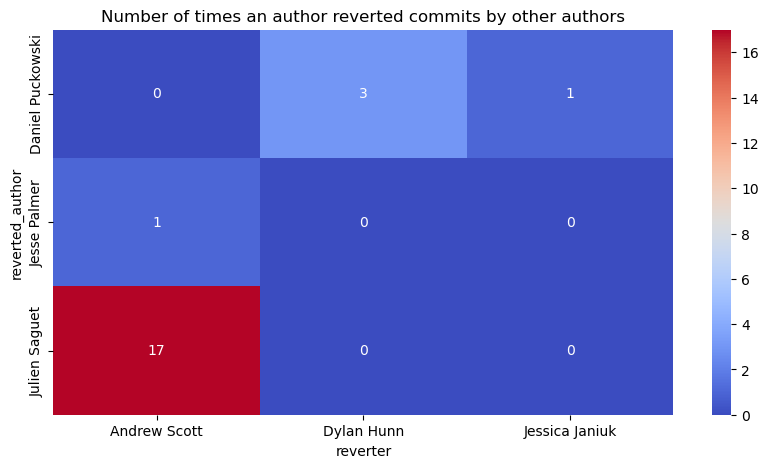

In [375]:
# try to make it visual so i can see better the corolation between the authors do only top 3
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the top 3 authors
top_3_authors = authors.head(20)

# Filter the reverted_by_all dataframe for the top 3 authors

reverted_by_all_top_3 = reverted_by_all[reverted_by_all['reverted_author'].isin(top_3_authors['author'])]

# Create a pivot table

pivot_table = reverted_by_all_top_3.pivot(index='reverted_author', columns='reverter', values='count')

# Fill NaN values with 0

pivot_table = pivot_table.fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Number of times an author reverted commits by other authors')
plt.show()


